In [18]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
#get stock price
df = web.DataReader('MSFT', data_source='yahoo', start='2018-01-01', end='2020-05-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,86.309998,85.500000,86.129997,85.949997,22483800.0,82.194328
2018-01-03,86.510002,85.970001,86.059998,86.349998,26061400.0,82.576843
2018-01-04,87.660004,86.570000,86.589996,87.110001,21912000.0,83.303658
2018-01-05,88.410004,87.430000,87.660004,88.190002,23407100.0,84.336464
2018-01-08,88.580002,87.599998,88.199997,88.279999,22113000.0,84.422516
...,...,...,...,...,...,...
2020-04-27,176.899994,173.300003,176.589996,174.050003,33194400.0,172.299103
2020-04-28,175.669998,169.389999,175.589996,169.809998,34392700.0,168.101730
2020-04-29,177.679993,171.880005,173.220001,177.429993,51286600.0,175.645081


In [3]:
# df shape

df.shape

(587, 6)

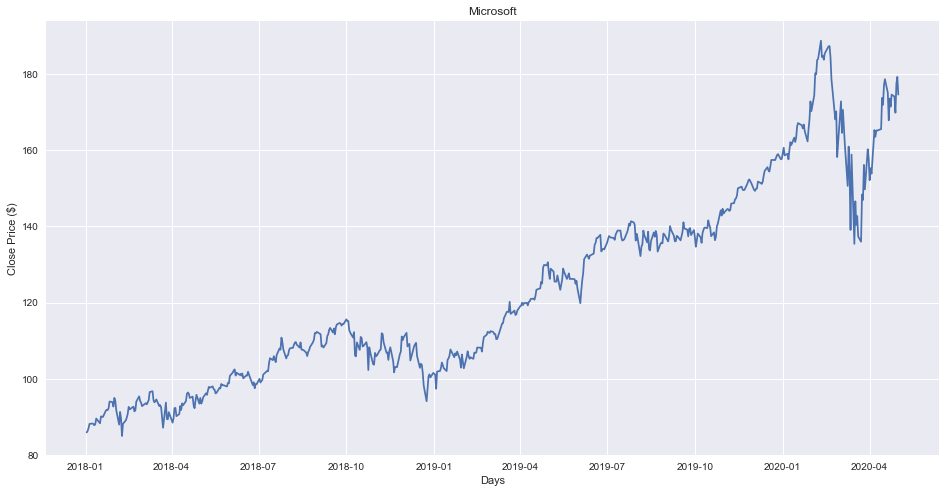

In [4]:
plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Days')
plt.ylabel("Close Price ($)")
plt.plot(df['Close'])
plt.show()

In [5]:
df = df[['Close']]

df.head()

,Close
Date,
2018-01-02,85.949997
2018-01-03,86.349998
2018-01-04,87.110001
2018-01-05,88.190002
2018-01-08,88.279999


In [6]:
#predict x days in future
future = 30

#add column
df['Prediction'] = df[['Close']].shift(-future)
df.tail()


C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
Date,,
2020-04-27,174.050003,NaN
2020-04-28,169.809998,NaN
2020-04-29,177.429993,NaN
2020-04-30,179.210007,NaN
2020-05-01,174.570007,NaN


In [7]:
X = np.array(df.drop(['Prediction'], 1))[:-future]
print(X)

[[ 85.94999695]
 [ 86.34999847]
 [ 87.11000061]
 [ 88.19000244]
 [ 88.27999878]
 [ 88.22000122]
 [ 87.81999969]
 [ 88.08000183]
 [ 89.59999847]
 [ 88.34999847]
 [ 90.13999939]
 [ 90.09999847]
 [ 90.        ]
 [ 91.61000061]
 [ 91.90000153]
 [ 91.81999969]
 [ 92.33000183]
 [ 94.05999756]
 [ 93.91999817]
 [ 92.73999786]
 [ 95.01000214]
 [ 94.26000214]
 [ 91.77999878]
 [ 88.        ]
 [ 91.33000183]
 [ 89.61000061]
 [ 85.01000214]
 [ 88.18000031]
 [ 89.12999725]
 [ 89.83000183]
 [ 90.80999756]
 [ 92.66000366]
 [ 92.        ]
 [ 92.72000122]
 [ 91.48999786]
 [ 91.73000336]
 [ 94.05999756]
 [ 95.41999817]
 [ 94.19999695]
 [ 93.76999664]
 [ 92.84999847]
 [ 93.05000305]
 [ 93.63999939]
 [ 93.31999969]
 [ 93.86000061]
 [ 94.43000031]
 [ 96.54000092]
 [ 96.76999664]
 [ 94.41000366]
 [ 93.84999847]
 [ 94.18000031]
 [ 94.59999847]
 [ 92.88999939]
 [ 93.12999725]
 [ 92.48000336]
 [ 89.79000092]
 [ 87.18000031]
 [ 93.77999878]
 [ 89.47000122]
 [ 89.38999939]
 [ 91.26999664]
 [ 88.51999664]
 [ 89.70

In [8]:
#Create target data, convert to numpy array

y = np.array(df['Prediction'])[:-future]

print(y)


[ 90.80999756  92.66000366  92.          92.72000122  91.48999786
  91.73000336  94.05999756  95.41999817  94.19999695  93.76999664
  92.84999847  93.05000305  93.63999939  93.31999969  93.86000061
  94.43000031  96.54000092  96.76999664  94.41000366  93.84999847
  94.18000031  94.59999847  92.88999939  93.12999725  92.48000336
  89.79000092  87.18000031  93.77999878  89.47000122  89.38999939
  91.26999664  88.51999664  89.70999908  92.33000183  92.37999725
  90.23000336  90.76999664  92.87999725  91.86000061  93.58000183
  93.08000183  94.16999817  96.06999969  96.44000244  96.11000061
  95.          95.34999847  93.12000275  92.30999756  94.26000214
  95.81999969  93.51999664  95.          93.51000214  94.06999969
  95.16000366  96.22000122  95.80999756  96.94000244  97.91000366
  97.69999695  98.02999878  97.31999969  97.15000153  96.18000031
  96.36000061  97.59999847  97.5         98.66000366  98.30999756
  98.36000061  98.01000214  98.94999695  98.83999634 100.79000092
 101.66999

In [9]:
#split into training and testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [32]:
#Create the modles
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model

lr = LinearRegression().fit(x_train, y_train)




In [33]:
x_future = df.drop(['Prediction'], 1)[:-future]

x_future = x_future.tail(future)

x_future = np.array(x_future)

x_future

array([[183.63000488],
       [183.88999939],
       [188.69999695],
       [184.44000244],
       [184.71000671],
       [183.71000671],
       [185.3500061 ],
       [187.22999573],
       [187.27999878],
       [184.41999817],
       [178.58999634],
       [170.88999939],
       [168.07000732],
       [170.16999817],
       [158.17999268],
       [162.00999451],
       [172.78999329],
       [164.50999451],
       [170.55000305],
       [166.27000427],
       [161.57000732],
       [150.61999512],
       [160.91999817],
       [153.63000488],
       [139.05999756],
       [158.83000183],
       [135.41999817],
       [146.57000732],
       [140.3999939 ],
       [142.71000671]])

In [24]:
#tree prediction model
tree_prediction = tree.predict(x_future)

print(tree_prediction)

#linear regression model
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[149.69999695 135.97999573 152.11000061 146.91999817 156.11000061
 149.69999695 160.22999573 157.71000671 152.11000061 155.25999451
 140.3999939  177.03999329 170.55000305 165.13000488 187.22999573
 165.50999451 173.69999695 171.88000488 177.03999329 172.78999329
 168.07000732 167.82000732 185.3500061  171.41999817 174.55000305
 174.05000305 135.66999817 177.42999268 152.32000732 174.57000732]
[184.3114075  184.55674887 189.0956578  185.07575408 185.33054107
 184.38690048 185.93447047 187.70850498 187.75568989 185.05687723
 179.55545088 172.28942123 169.62836226 171.60999886 160.29574302
 163.9098882  174.08233259 166.26898967 171.96858689 167.92980632
 163.49469844 153.16182248 162.88132342 156.00218987 142.25333959
 160.90911805 138.81848843 149.34008962 143.51781453 145.69763638]


C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


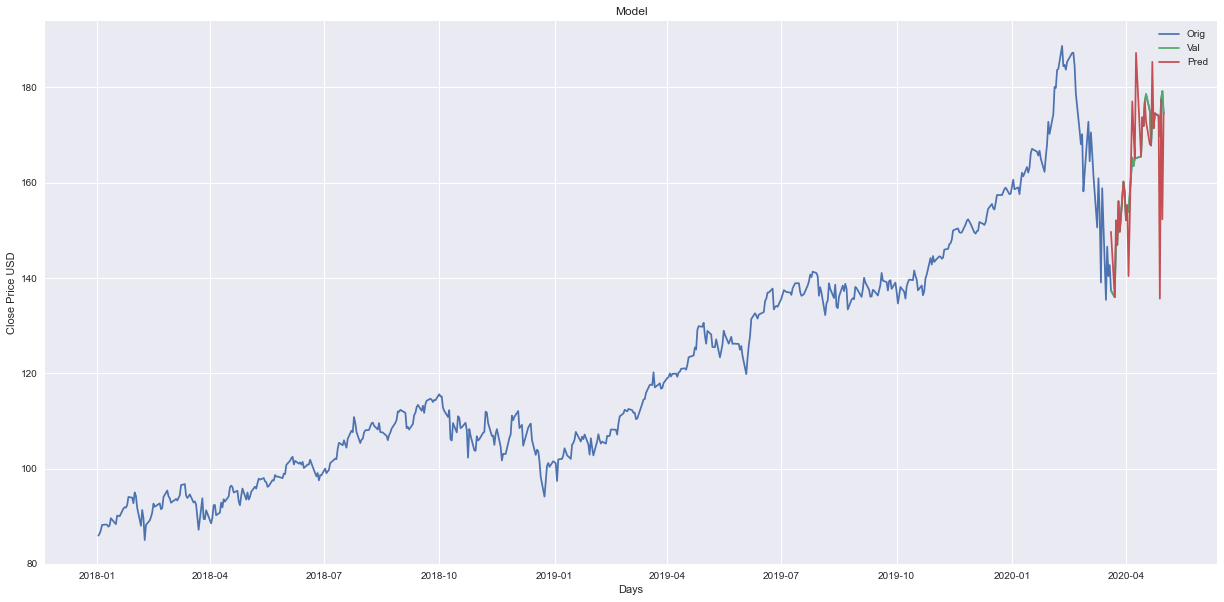

In [25]:
#vizualization

predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(21,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


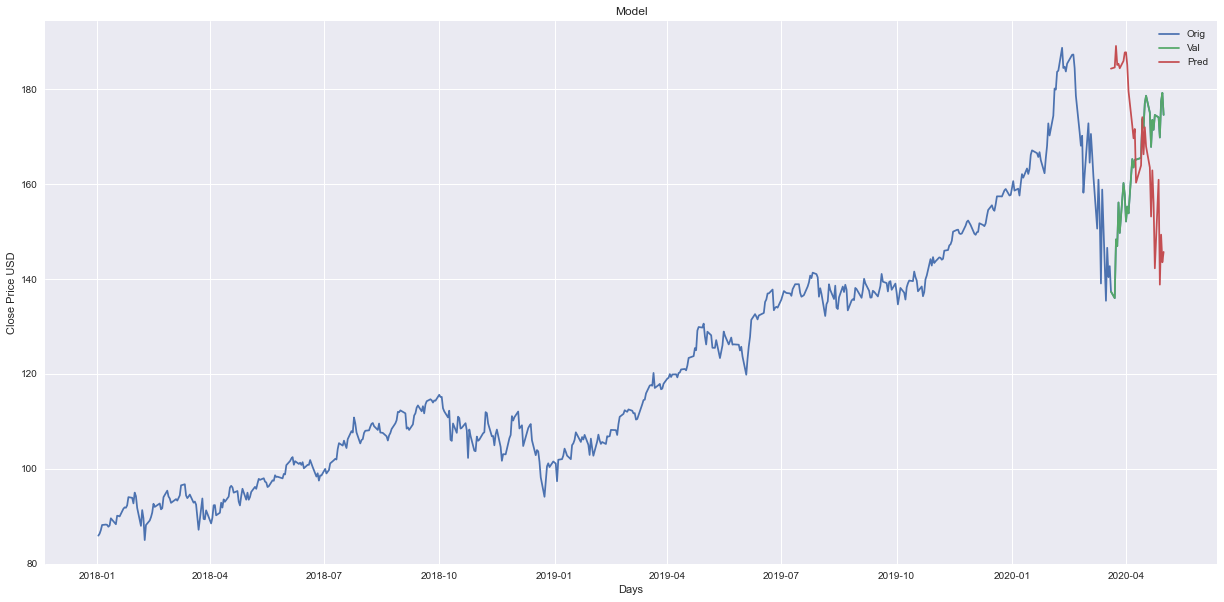

In [14]:
#vizualization

predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(21,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [30]:
#score 
lr.score(x_test, y_test)

0.8283571027193627

In [31]:
tree.score(x_test, y_test)

0.8864661456093754